#  Group level windowed mean analysis of H3

each session consisted of 60 trials, participants did 3 sessions each

Look for tutorial on splitting epochs:

https://mne.tools/1.8/auto_tutorials/epochs/10_epochs_overview.html#selecting-epochs-by-index


What we need to do:
- split all epochs after 60 images, to have three trials
- possibly remove first 5 instances from all lists

In [151]:
# import libraries


import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import mne
from mne.preprocessing import ICA
import pandas as pd
from scipy.stats import zscore
from scipy import stats 


# Define variables

In [152]:
# We used a different script to run FaceWord experiment on Monday where triggers 101 

# defining the events
event_id_monday_recording = {
    'Word/wPos': 11, # positive word
    'Wait/wPos': 31, # waiting time after positive word 
    'Image/wPos': 21, # positive image (always following pos word) 
    'Word/wNeg': 12, # negative word
    'Wait/wNeg': 32, # waiting time after negative word 
    'Image/wNeg': 22, # negative image (always following neg word) 
    'Word/wNeu': 13, # neutral word
    'Wait/wNeu/iPos': 51, # wait time after neu w (before pos i) 
    'Image/wNeu/iPos': 41, # positive image (after neu word) 
    'Wait/wNeu/iNeg': 52, # wait time after neu w (before neg i) 
    'Image/wNeu/iNeg': 42, # negative image (after neu word) 
    'Correct/wPos': 201, # correct response ('b') to pos w + image 
    'Correct/wNeg': 102, # correct response ('y') to neg w + image 
    'Correct/wNeu/iPos': 111, # cor resp ('b') to neu w + pos image 
    'Correct/wNeu/iNeg': 112, # cor resp ('y') to neu w + neg image 
    'Incorrect/wPos': 202, # incor resp ('y') to pos w + image 
    'Incorrect/wNeg': 101, # incor resp ('b') to neg w + image 
    'Incorrect/wNeu/iPos': 212, # incor resp ('y') to neu w + pos i 
    'Incorrect/Neu/iNeg': 211 # incor resp ('b') to neu w + neg i
}

event_id = {
    'Word/wPos': 11, # positive word
    'Wait/wPos': 31, # waiting time after positive word 
    'Image/wPos': 21, # positive image (always following pos word) 
    'Word/wNeg': 12, # negative word
    'Wait/wNeg': 32, # waiting time after negative word 
    'Image/wNeg': 22, # negative image (always following neg word) 
    'Word/wNeu': 13, # neutral word
    'Wait/wNeu/iPos': 51, # wait time after neu w (before pos i) 
    'Image/wNeu/iPos': 41, # positive image (after neu word) 
    'Wait/wNeu/iNeg': 52, # wait time after neu w (before neg i) 
    'Image/wNeu/iNeg': 42, # negative image (after neu word) 
    'Correct/wPos': 101, # correct response ('b') to pos w + image 
    'Correct/wNeg': 102, # correct response ('y') to neg w + image 
    'Correct/wNeu/iPos': 111, # cor resp ('b') to neu w + pos image 
    'Correct/wNeu/iNeg': 112, # cor resp ('y') to neu w + neg image 
    'Incorrect/wPos': 202, # incor resp ('y') to pos w + image 
    'Incorrect/wNeg': 201, # incor resp ('b') to neg w + image 
    'Incorrect/wNeu/iPos': 212, # incor resp ('y') to neu w + pos i 
    'Incorrect/Neu/iNeg': 211 # incor resp ('b') to neu w + neg i
}

# Load in the Epochs

In [153]:
def load_epochs(data_path: Path, picks: list[str] = ["eeg"], preload: bool = True) -> list[mne.epochs.EpochsFIF]:
    """
    This function loops over files in data_path and loads all files ending with "-epo.fif",
    while storing the subject name (filename) into metadata.
    """

    epochs = []  # Empty list for storing the epochs

    for f in data_path.iterdir():
        if f.name.endswith("-epo.fif"):
            try:
                tmp_epochs = mne.read_epochs(f, preload=preload)
                tmp_epochs.pick(picks)
                
                if tmp_epochs.metadata is None:
                    n_epochs = len(tmp_epochs)
                    tmp_epochs.metadata = pd.DataFrame(index=np.arange(n_epochs))
                
                tmp_epochs.metadata["subject"] = f.stem  # filename without extension

                epochs.append(tmp_epochs)
            except Exception as e:
                print(f"Error loading {f}: {e}")

    return epochs


In [154]:
# load in the data using the function

data_path = Path("epochs/final")

all_epochs = load_epochs(data_path, picks=["eeg"])



Reading /Users/rekaforgo/Downloads/epochs/final/group1_fw-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...     696.00 ms
        0 CTF compensation matrices available
Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 0 columns
Reading /Users/rekaforgo/Downloads/epochs/final/group20_fw-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...     696.00 ms
        0 CTF compensation matrices available
Not setting metadata
727 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 0 columns
Reading /Users/rekaforgo/Downloads/epochs/final/group9_fw-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...     696.00 ms
        0 CTF compensation matrices available
Not setting metadata
739 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 0 columns
Reading /Users/rek

## Counting epochs

## N1 analysis

In [155]:
#for N1 analysis
picks = ["Oz"]

#time window
tmin = 0.14
tmax = 0.2

#create split for genearlly images and words together but also apart.

In [157]:
#images and words together

# create empty arrays to store the data 
first_session = np.array([])
second_session = np.array([])
third_session = np.array([])

for epochs in all_epochs:
    
    epochs_img = epochs["Image"]

    epochs1 = epochs_img[5:60]    
    epochs2 = epochs_img[65:120] 
    epochs3 = epochs_img[125:] 

    # Compute mean amplitude for first block (or NaN if missing)
    data1 = epochs1.get_data(picks=picks, tmin=tmin, tmax=tmax)

    data2 = epochs2.get_data(picks=picks, tmin=tmin, tmax=tmax)
    data3 = epochs3.get_data(picks=picks, tmin=tmin, tmax=tmax)

    data2_mean = np.mean(data2, axis=(0, 1, 2))
    data3_mean = np.mean(data3, axis=(0, 1, 2))
    data1_mean = np.mean(data1, axis=(0, 1, 2))

    first_session = np.append(first_session, data1_mean)
    second_session = np.append(second_session, data2_mean)
    third_session = np.append(third_session, data3_mean)

print(first_session)
print(second_session)
print(third_session)

[-4.96159920e-06 -3.13868844e-06 -7.59958078e-06 -4.63954512e-06
 -1.08149060e-06  1.23585542e-06 -6.90946645e-06 -4.02557247e-06]
[-4.52935117e-06 -4.58303931e-06 -8.15345840e-06 -5.86180609e-06
 -2.50476896e-06  2.17107646e-06 -8.17953046e-06 -3.36618817e-06]
[-5.11299555e-06 -4.97364381e-06 -6.38787642e-06 -5.16977896e-06
 -1.10130466e-06  3.82156421e-06 -7.24818839e-06 -2.56209194e-06]


In [158]:
from scipy import stats

# Paired t-test: first vs second
print("1st vs 2nd:", stats.ttest_rel(first_session, second_session))
# Paired t-test: first vs third
print("1st vs 3rd:", stats.ttest_rel(first_session, third_session))
# Paired t-test: second vs third
print("2nd vs 3rd:", stats.ttest_rel(second_session, third_session))




1st vs 2nd: TtestResult(statistic=1.3613511492745214, pvalue=0.2155978096672101, df=7)
1st vs 3rd: TtestResult(statistic=-0.6103185565580805, pvalue=0.5609344230385286, df=7)
2nd vs 3rd: TtestResult(statistic=-2.53000266773483, pvalue=0.039232793922584386, df=7)


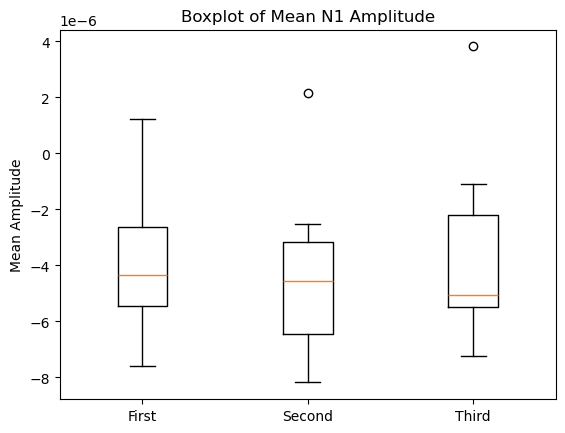

In [160]:
data = [first_session, second_session, third_session]
# Create a DataFrame


plt.boxplot(data, tick_labels=['First', 'Second', 'Third'])
plt.title('Boxplot of Mean N1 Amplitude')
plt.ylabel('Mean Amplitude')
plt.show();


In [162]:
# prep data for plotting

first_session = np.array([])
second_session = np.array ([])
third_session = np.array([])

#slicing based on trials - each showing 60 images

for epochs in all_epochs:

    epochs_img = epochs["Image"]

    epochs1 = epochs_img[5:60]
    epochs2 = epochs_img[65:120]
    epochs3 = epochs_img[125:]

    
    data1 = epochs1.get_data(picks=picks)
    data2 = epochs2.get_data(picks=picks)
    data3 = epochs3.get_data(picks=picks)
    
    data1_mean = np.mean(data1, axis=(0, 1))
    data2_mean = np.mean(data2, axis=(0, 1))
    data3_mean = np.mean(data3, axis=(0, 1))

    # calculate the mean over the channel and trial dimension (axis 1 and 2)
    # we keep the time dimension (axis 0) to plot the time course
    first_session = np.concatenate((first_session, data1_mean), axis=0)
    second_session = np.concatenate((second_session, data2_mean), axis = 0)
    third_session = np.concatenate((third_session, data3_mean), axis = 0)
    

print(first_session.shape)
print(second_session.shape)
print(third_session.shape)

#reshape to participant, time
first_session = first_session.reshape(8, 200)
second_session = second_session.reshape(8, 200)
third_session = third_session.reshape(8, 200)


print(first_session.shape)
print(second_session.shape)
print(third_session.shape)



(1600,)
(1600,)
(1600,)
(8, 200)
(8, 200)
(8, 200)


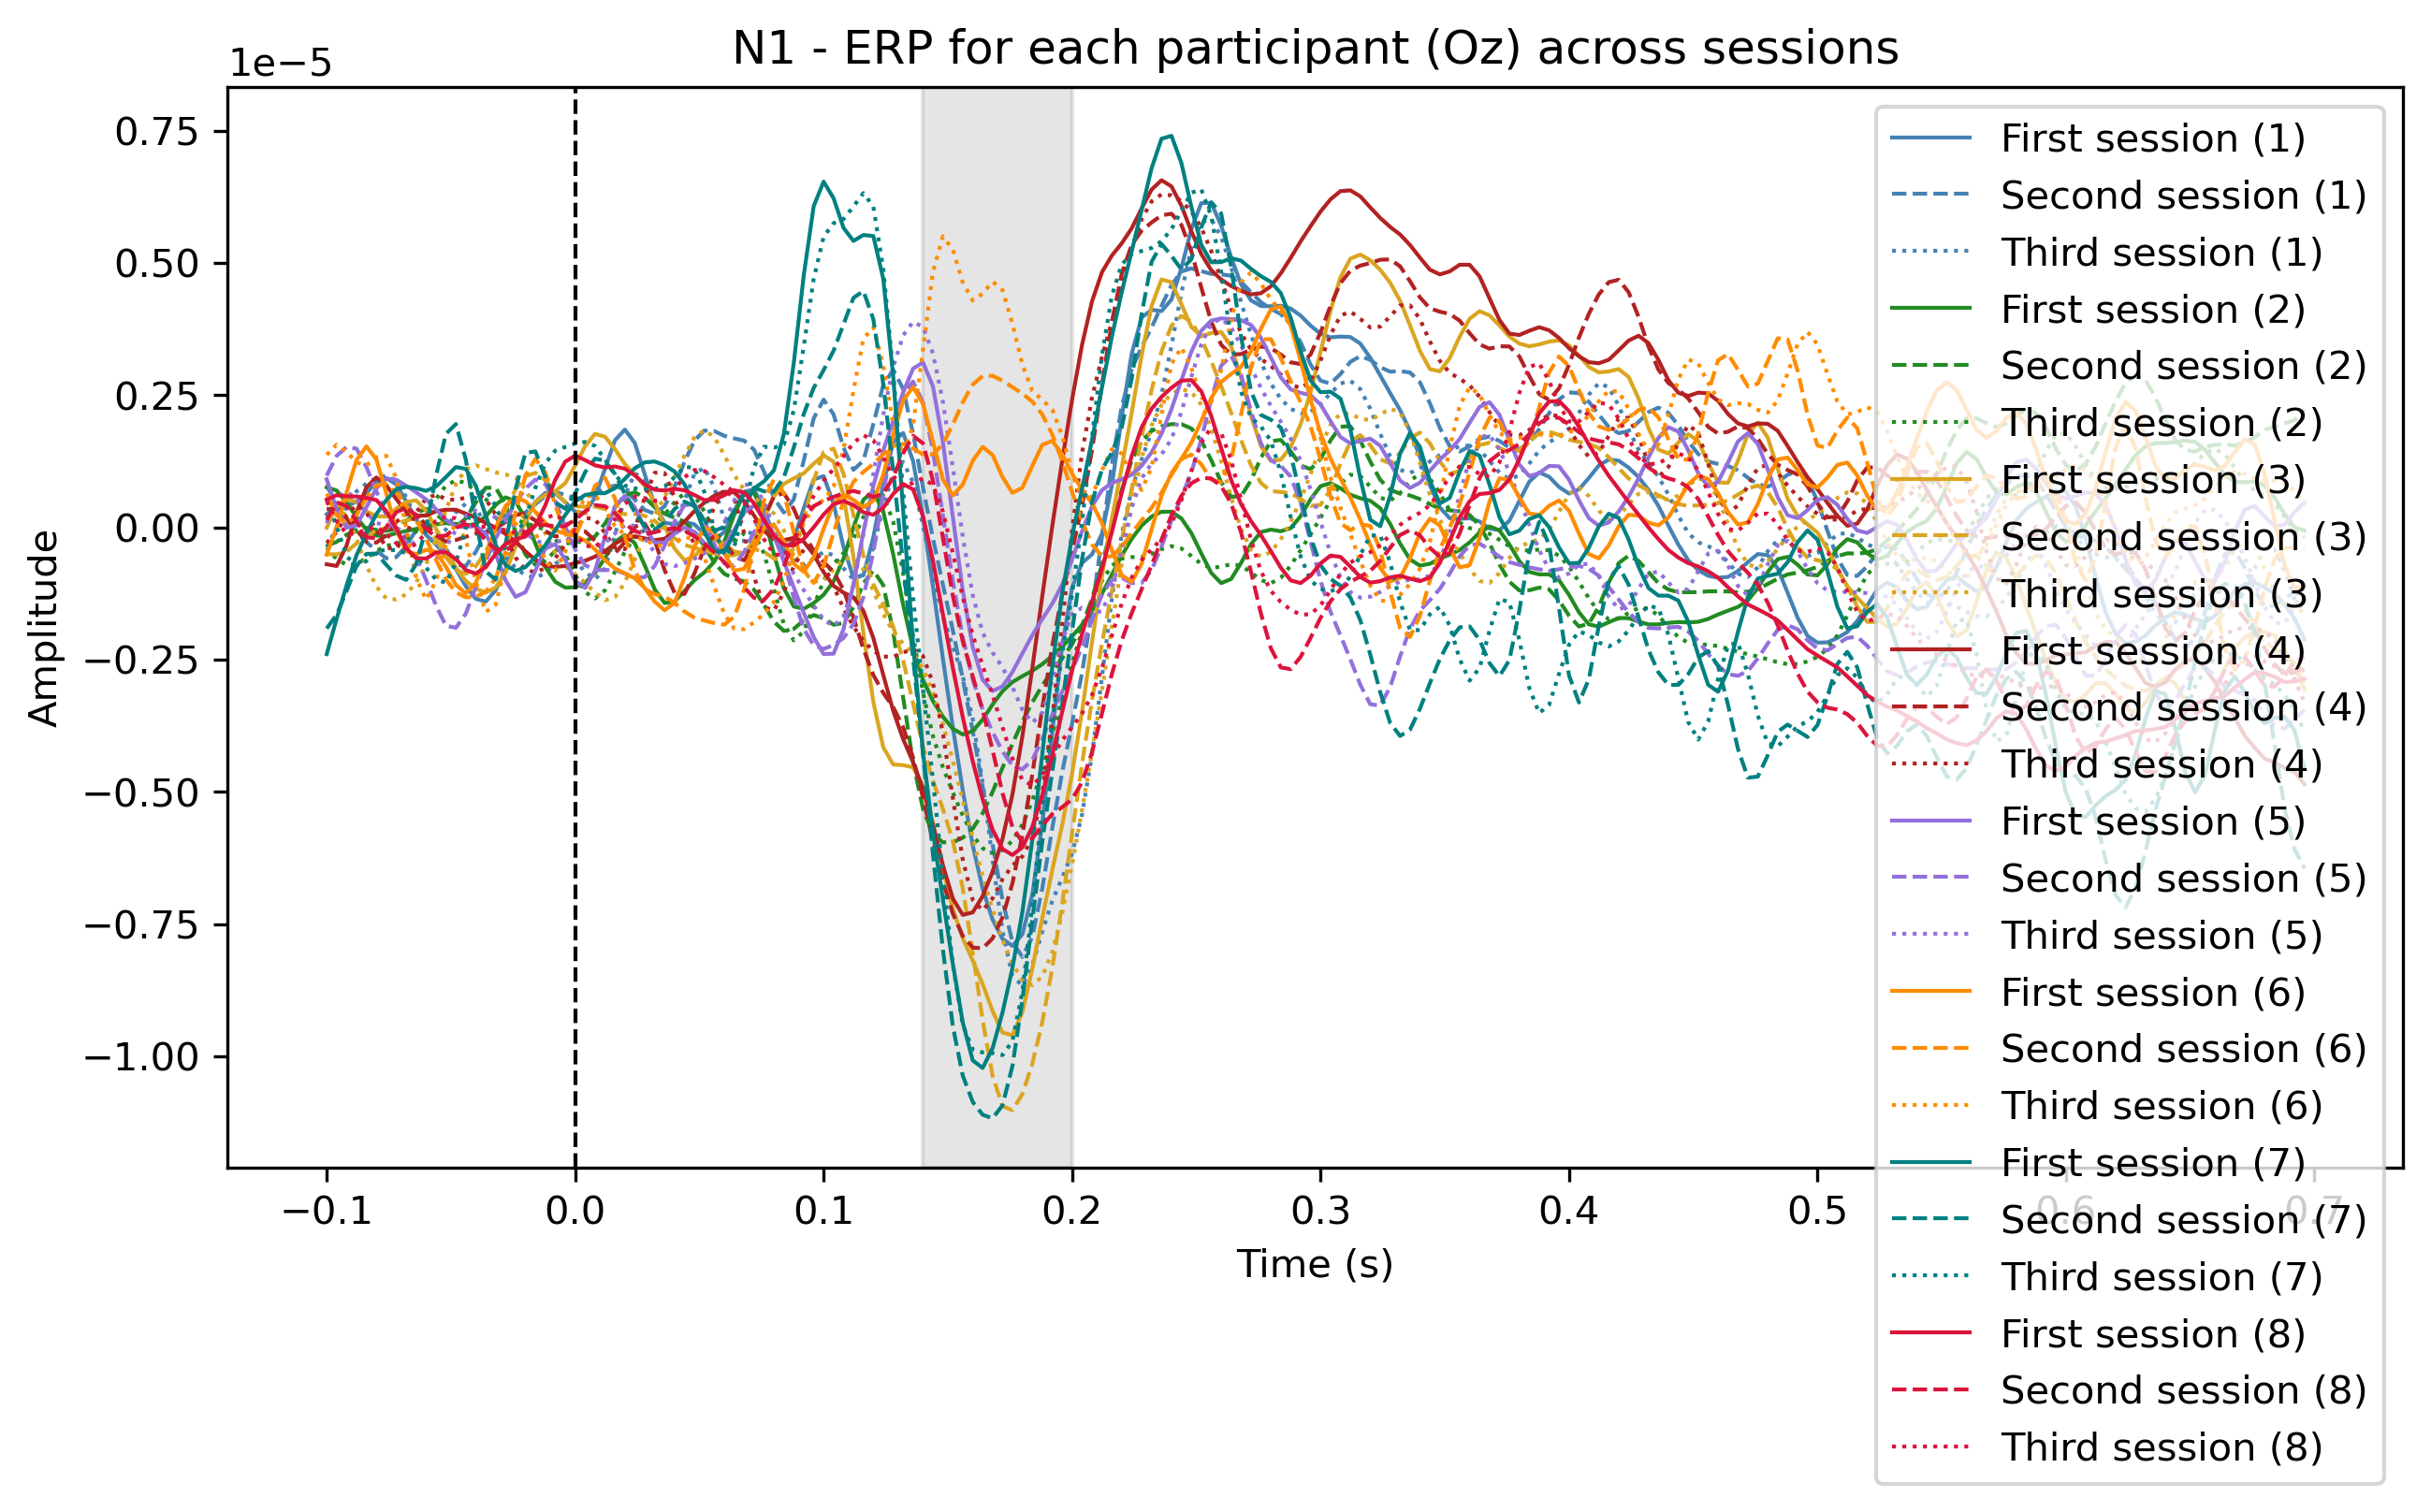

In [164]:
# plotting averaged timecourses for each participant
colours = [
    "steelblue",
    "forestgreen",
    "goldenrod",
    "firebrick",
    "mediumpurple",
    "darkorange",
    "teal",
    "crimson",
    "darkcyan",
    "slateblue",
    "olivedrab",
    "deeppink",
    "cadetblue",
    "indianred"
]

times = all_epochs[0].times

fig, ax = plt.subplots(1, figsize=(10, 5), dpi=300)

# plot the time window
ax.axvspan(tmin, tmax, color="grey", alpha=0.2)

for participant in range(8):

    ax.plot(times, first_session[participant, :], label=f"First session ({participant+1})", linestyle="-", color=colours[participant], linewidth=1)
    ax.plot(times, second_session[participant, :], label=f"Second session ({participant+1})", linestyle="--", color=colours[participant], linewidth=1)
    ax.plot(times, third_session[participant, :], label=f"Third session ({participant+1})", linestyle=":", color=colours[participant], linewidth=1)


# vertical line at 0
ax.axvline(x=0, color="black", linestyle="--", linewidth=1)

ax.set(xlabel="Time (s)", ylabel="Amplitude", title="N1 - ERP for each participant (Oz) across sessions")

ax.legend()

#plt.savefig("erp_participants.png", format="png", dpi=300, bbox_inches="tight")
plt.show();



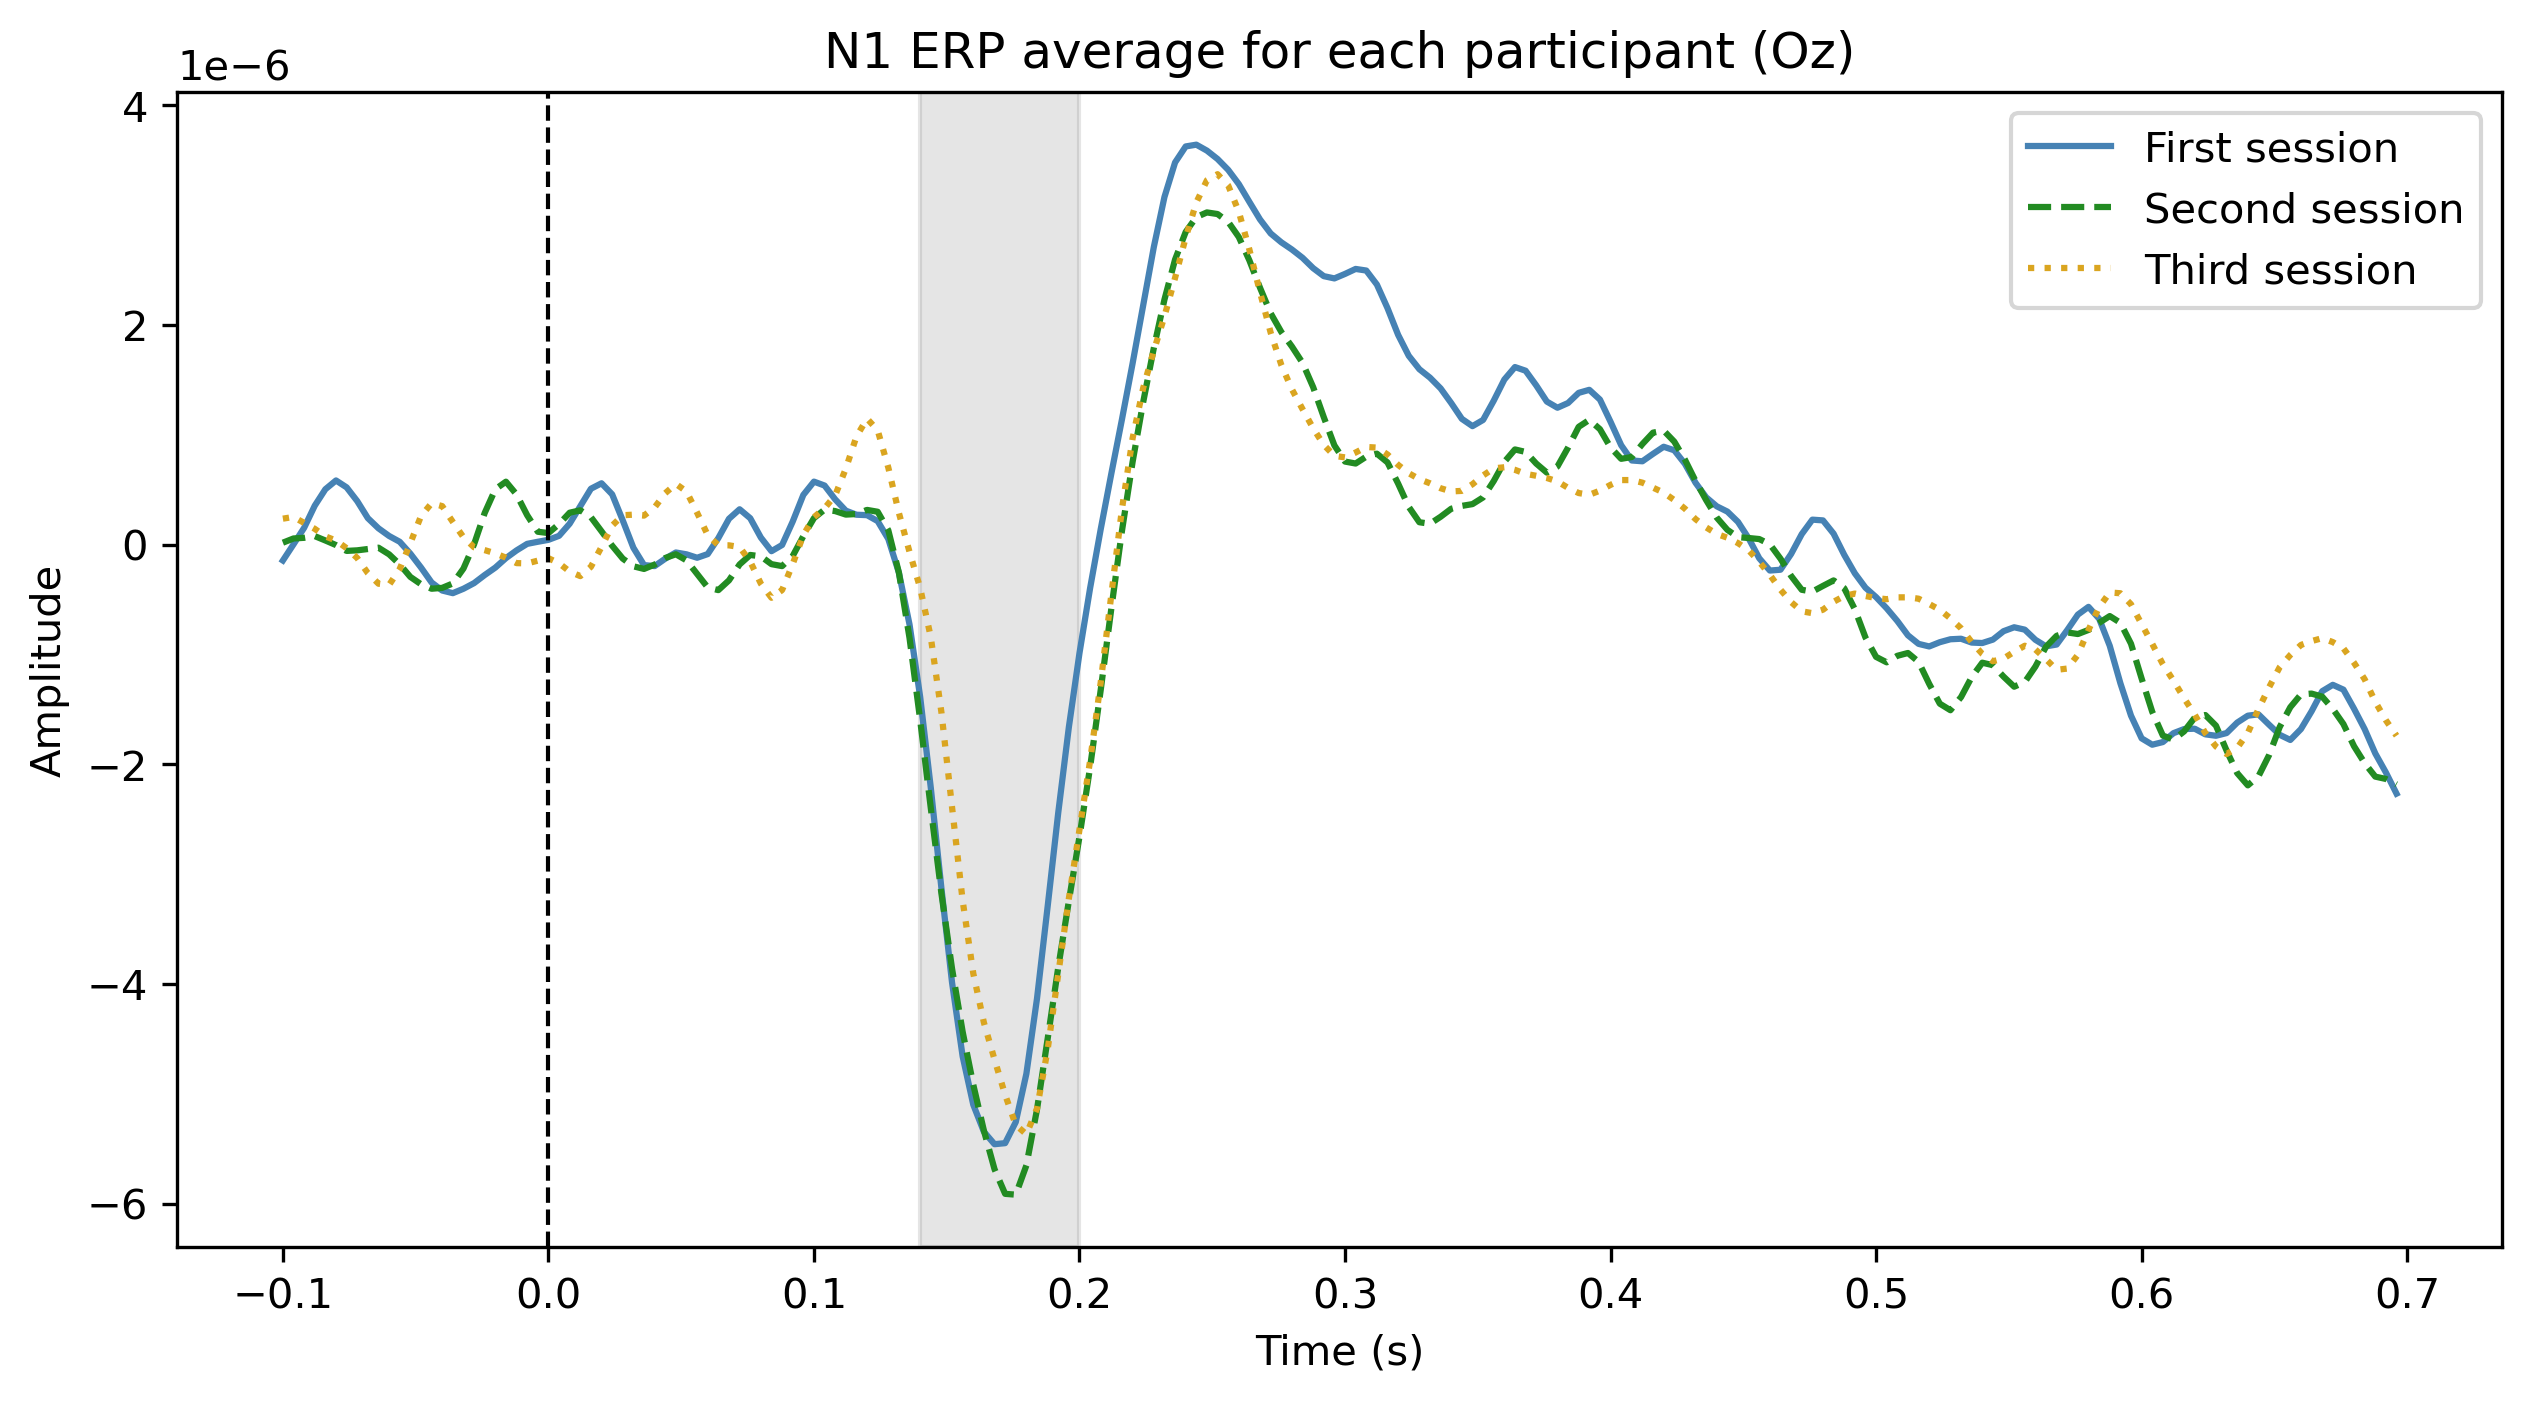

In [165]:
# averaging over participants
fig, ax = plt.subplots(1, figsize=(10, 5), dpi=300)

# plot the time window
ax.axvspan(tmin, tmax, color="grey", alpha=0.2)

ax.plot(times, first_session.mean(axis=0), label="First session", linestyle="-", color=colours[0])
ax.plot(times, second_session.mean(axis=0), label="Second session", linestyle="--", color=colours[1])
ax.plot(times, third_session.mean(axis=0), label="Third session", linestyle=":", color=colours[2])

# vertical line at 0
ax.axvline(x=0, color="black", linestyle="--", linewidth=1)

ax.set(xlabel="Time (s)", ylabel="Amplitude", title="N1 ERP average for each participant (Oz)")
ax.legend()

plt.savefig("erp_avg_LPP.png", format="png", dpi=300, bbox_inches="tight")

plt.show();

In [167]:
# export to CSV


picks = ["Oz"]
#time window
tmin = 0.14
tmax = 0.2

# load in the data session info
data_path = Path("FaceWord_EEG") 

# loading in the file with the bad channels identified by each group
session_info_path = data_path / "session_info.txt"

# load in session information (bad channels, etc.) txt file with dictionary
with open(session_info_path, "r") as f:
    session_info = eval(f.read())

df_list = []
for subj, epochs in zip(session_info.keys(), all_epochs):
    # --- find the time‐sample indices --------------
    times = epochs.times
    win_mask = (times >= tmin) & (times <= tmax)

    # --- get the data & compute LPP ---------------
    # shape = (n_epochs, n_channels, n_times)
    data = epochs.get_data(picks=picks)
    # mean over time, then over channels → (n_epochs,)
    epn_vals = data[:, :, win_mask].mean(axis=2).mean(axis=1) * 1e6  # in µV

    # --- pull out the trial‐by‐trial condition name
    inv_event_id = {v: k for k, v in epochs.event_id.items()}
    conds = [inv_event_id[code] for code in epochs.events[:, 2]]

    # --- build a per‐subject DataFrame --------------
    df_subj = pd.DataFrame({
        'Subject': subj,
        'Condition': conds,
        'N1_100_200ms': epn_vals
    })

    df_list.append(df_subj)

# --- concatenate all subjects and write CSV -------
df_all = pd.concat(df_list, ignore_index=True)
df_all.to_csv('N1_100_200ms.csv', index=False)
print("Saved → N1_100_200ms.csv")


Saved → N1_100_200ms.csv


## N2b Amplitudes

In [168]:

picks = ["Fz"]
#time window
tmin = 0.2
tmax = 0.35

# create empty arrays to store the data 
first_session_img = np.array([])
second_session_img = np.array([])
third_session_img = np.array([])

first_session_word = np.array([])
second_session_word = np.array([])
third_session_word = np.array([])

for epochs in all_epochs:
    epochs_img = epochs["Image"]
    epochs_word = epochs["Word"]

    epochs1_img = epochs_img[5:60]    
    epochs2_img = epochs_img[65:120] 
    epochs3_img = epochs_img[125:] 

    epochs1_word = epochs_word[5:60]
    epochs2_word = epochs_word[65:120]
    epochs3_word = epochs_word[125:]

    # Compute mean amplitude for first block (or NaN if missing)
    data1_img = epochs1_img.get_data(picks=picks, tmin=tmin, tmax=tmax)
    data2_img = epochs2_img.get_data(picks=picks, tmin=tmin, tmax=tmax)
    data3_img = epochs3_img.get_data(picks=picks, tmin=tmin, tmax=tmax)

    data1_word = epochs1_word.get_data(picks=picks, tmin=tmin, tmax=tmax)
    data2_word = epochs2_word.get_data(picks=picks, tmin=tmin, tmax=tmax)
    data3_word = epochs3_word.get_data(picks=picks, tmin=tmin, tmax=tmax)

    data2_mean_img = np.mean(data2_img, axis=(0, 1, 2))
    data3_mean_img = np.mean(data3_img, axis=(0, 1, 2))
    data1_mean_img = np.mean(data1_img, axis=(0, 1, 2))

    data2_word_mean = np.mean(data2_word, axis=(0, 1, 2))
    data3_word_mean = np.mean(data3_word, axis=(0, 1, 2))
    data1_word_mean = np.mean(data1_word, axis=(0, 1, 2))


    first_session_img = np.append(first_session_img, data1_mean_img)
    second_session_img = np.append(second_session_img, data2_mean_img)
    third_session_img = np.append(third_session_img, data3_mean_img)

    first_session_word = np.append(first_session_word, data1_word_mean)
    second_session_word = np.append(second_session_word, data2_word_mean)
    third_session_word = np.append(third_session_word, data3_word_mean)




1st vs 2nd: TtestResult(statistic=-1.8072505507381558, pvalue=0.11367153599542365, df=7)
1st vs 3rd: TtestResult(statistic=-1.8191562732432747, pvalue=0.11170655164888034, df=7)
2nd vs 3rd: TtestResult(statistic=-0.3113798741965329, pvalue=0.7645804668852516, df=7)
1st vs 2nd: TtestResult(statistic=-0.014602087108139303, pvalue=0.9887570992095058, df=7)
1st vs 3rd: TtestResult(statistic=-3.0312479350790236, pvalue=0.01908097232379245, df=7)
2nd vs 3rd: TtestResult(statistic=-2.3545838929547926, pvalue=0.05074404446826747, df=7)
1st vs 1st: TtestResult(statistic=-3.1854475434373515, pvalue=0.015373678014127536, df=7)
2nd vs 2nd: TtestResult(statistic=-3.540623955411969, pvalue=0.009461938786107068, df=7)
3rd vs 3rd: TtestResult(statistic=-4.059490222445875, pvalue=0.004812695154613714, df=7)


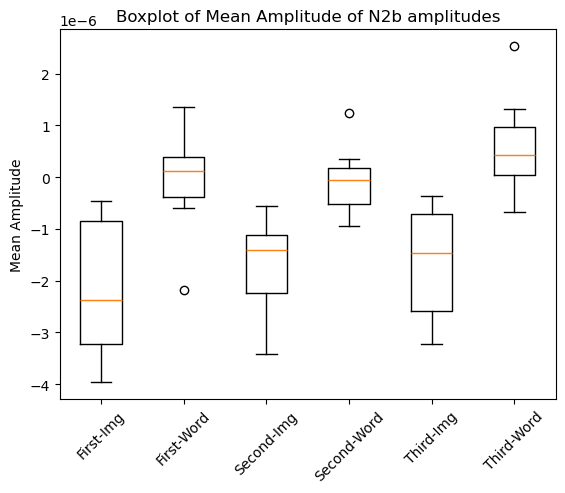

In [169]:
#stats test for N2b

#Find a t-test method for differentiating between the means !!
#Statsmodels pairwise t-test
import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy import stats

# Paired t-test: first vs second
print("1st vs 2nd:", stats.ttest_rel(first_session_img, second_session_img))
# Paired t-test: first vs third
print("1st vs 3rd:", stats.ttest_rel(first_session_img, third_session_img))
# Paired t-test: second vs third
print("2nd vs 3rd:", stats.ttest_rel(second_session_img, third_session_img))

# Paired t-test: first vs second
print("1st vs 2nd:", stats.ttest_rel(first_session_word, second_session_word))
# Paired t-test: first vs third
print("1st vs 3rd:", stats.ttest_rel(first_session_word, third_session_word))
# Paired t-test: second vs third
print("2nd vs 3rd:", stats.ttest_rel(second_session_word, third_session_word))

# Paired t-test: first vs first
print("1st vs 1st:", stats.ttest_rel(first_session_img, first_session_word))
# Paired t-test: second vs second
print("2nd vs 2nd:", stats.ttest_rel(second_session_img, second_session_word))
# Paired t-test: third vs third
print("3rd vs 3rd:", stats.ttest_rel(third_session_img, third_session_word))

#boxplot
data = [first_session_img, first_session_word, second_session_img, second_session_word, third_session_img, third_session_word]
# Create a DataFrame


plt.boxplot(data, tick_labels=['First-Img', 'First-Word', 'Second-Img', 'Second-Word', 'Third-Img', 'Third-Word'])
plt.xticks(rotation=45)
plt.title('Boxplot of Mean Amplitude of N2b amplitudes')
plt.ylabel('Mean Amplitude')
plt.show();


In [170]:

# prep data for plotting

first_session_pos = np.array([])
second_session_pos = np.array ([])
third_session_pos = np.array([])

first_session_neg = np.array([])
second_session_neg = np.array ([])
third_session_neg = np.array([])

#slicing based on trials - each showing 60 images

for epochs in all_epochs:
    epochs_img_pos = epochs["Image"]
    epochs_img_neg = epochs["Word"]

    epochs1_pos = epochs_img_pos[5:60]
    epochs2_pos = epochs_img_pos[65:120]
    epochs3_pos = epochs_img_pos[125:]

    epochs1_neg = epochs_img_neg[5:60]
    epochs2_neg = epochs_img_neg[65:120]
    epochs3_neg = epochs_img_neg[125:]
    # Compute mean amplitude for first block (or NaN if missing)
    data1_pos = epochs1_pos.get_data(picks=picks)
    data2_pos = epochs2_pos.get_data(picks=picks)
    data3_pos = epochs3_pos.get_data(picks=picks)
    data1_neg = epochs1_neg.get_data(picks=picks)
    data2_neg = epochs2_neg.get_data(picks=picks)
    data3_neg = epochs3_neg.get_data(picks=picks)

    data1_pos_mean = np.mean(data1_pos, axis=(0, 1))
    data2_pos_mean = np.mean(data2_pos, axis=(0, 1))
    data3_pos_mean = np.mean(data3_pos, axis=(0, 1))
    data1_neg_mean = np.mean(data1_neg, axis=(0, 1))
    data2_neg_mean = np.mean(data2_neg, axis=(0, 1))
    data3_neg_mean = np.mean(data3_neg, axis=(0, 1))
    # calculate the mean over the channel and trial dimension (axis 1 and 2)
    # we keep the time dimension (axis 0) to plot the time course
    first_session_pos = np.concatenate((first_session_pos, data1_pos_mean), axis=0)
    second_session_pos = np.concatenate((second_session_pos, data2_pos_mean), axis = 0)
    third_session_pos = np.concatenate((third_session_pos, data3_pos_mean), axis = 0)
    first_session_neg = np.concatenate((first_session_neg, data1_neg_mean), axis=0)
    second_session_neg = np.concatenate((second_session_neg, data2_neg_mean), axis = 0)
    third_session_neg = np.concatenate((third_session_neg, data3_neg_mean), axis = 0)


#reshape to participant, time
first_session_pos = first_session_pos.reshape(8, 200)
second_session_pos = second_session_pos.reshape(8, 200)
third_session_pos = third_session_pos.reshape(8, 200)

first_session_neg = first_session_neg.reshape(8, 200)
second_session_neg = second_session_neg.reshape(8, 200)
third_session_neg = third_session_neg.reshape(8, 200)
# Print the shapes of the reshaped arrays
print(first_session_pos.shape)
print(second_session_pos.shape)
print(third_session_pos.shape)
print(first_session_neg.shape)
print(second_session_neg.shape)
print(third_session_neg.shape)


(8, 200)
(8, 200)
(8, 200)
(8, 200)
(8, 200)
(8, 200)


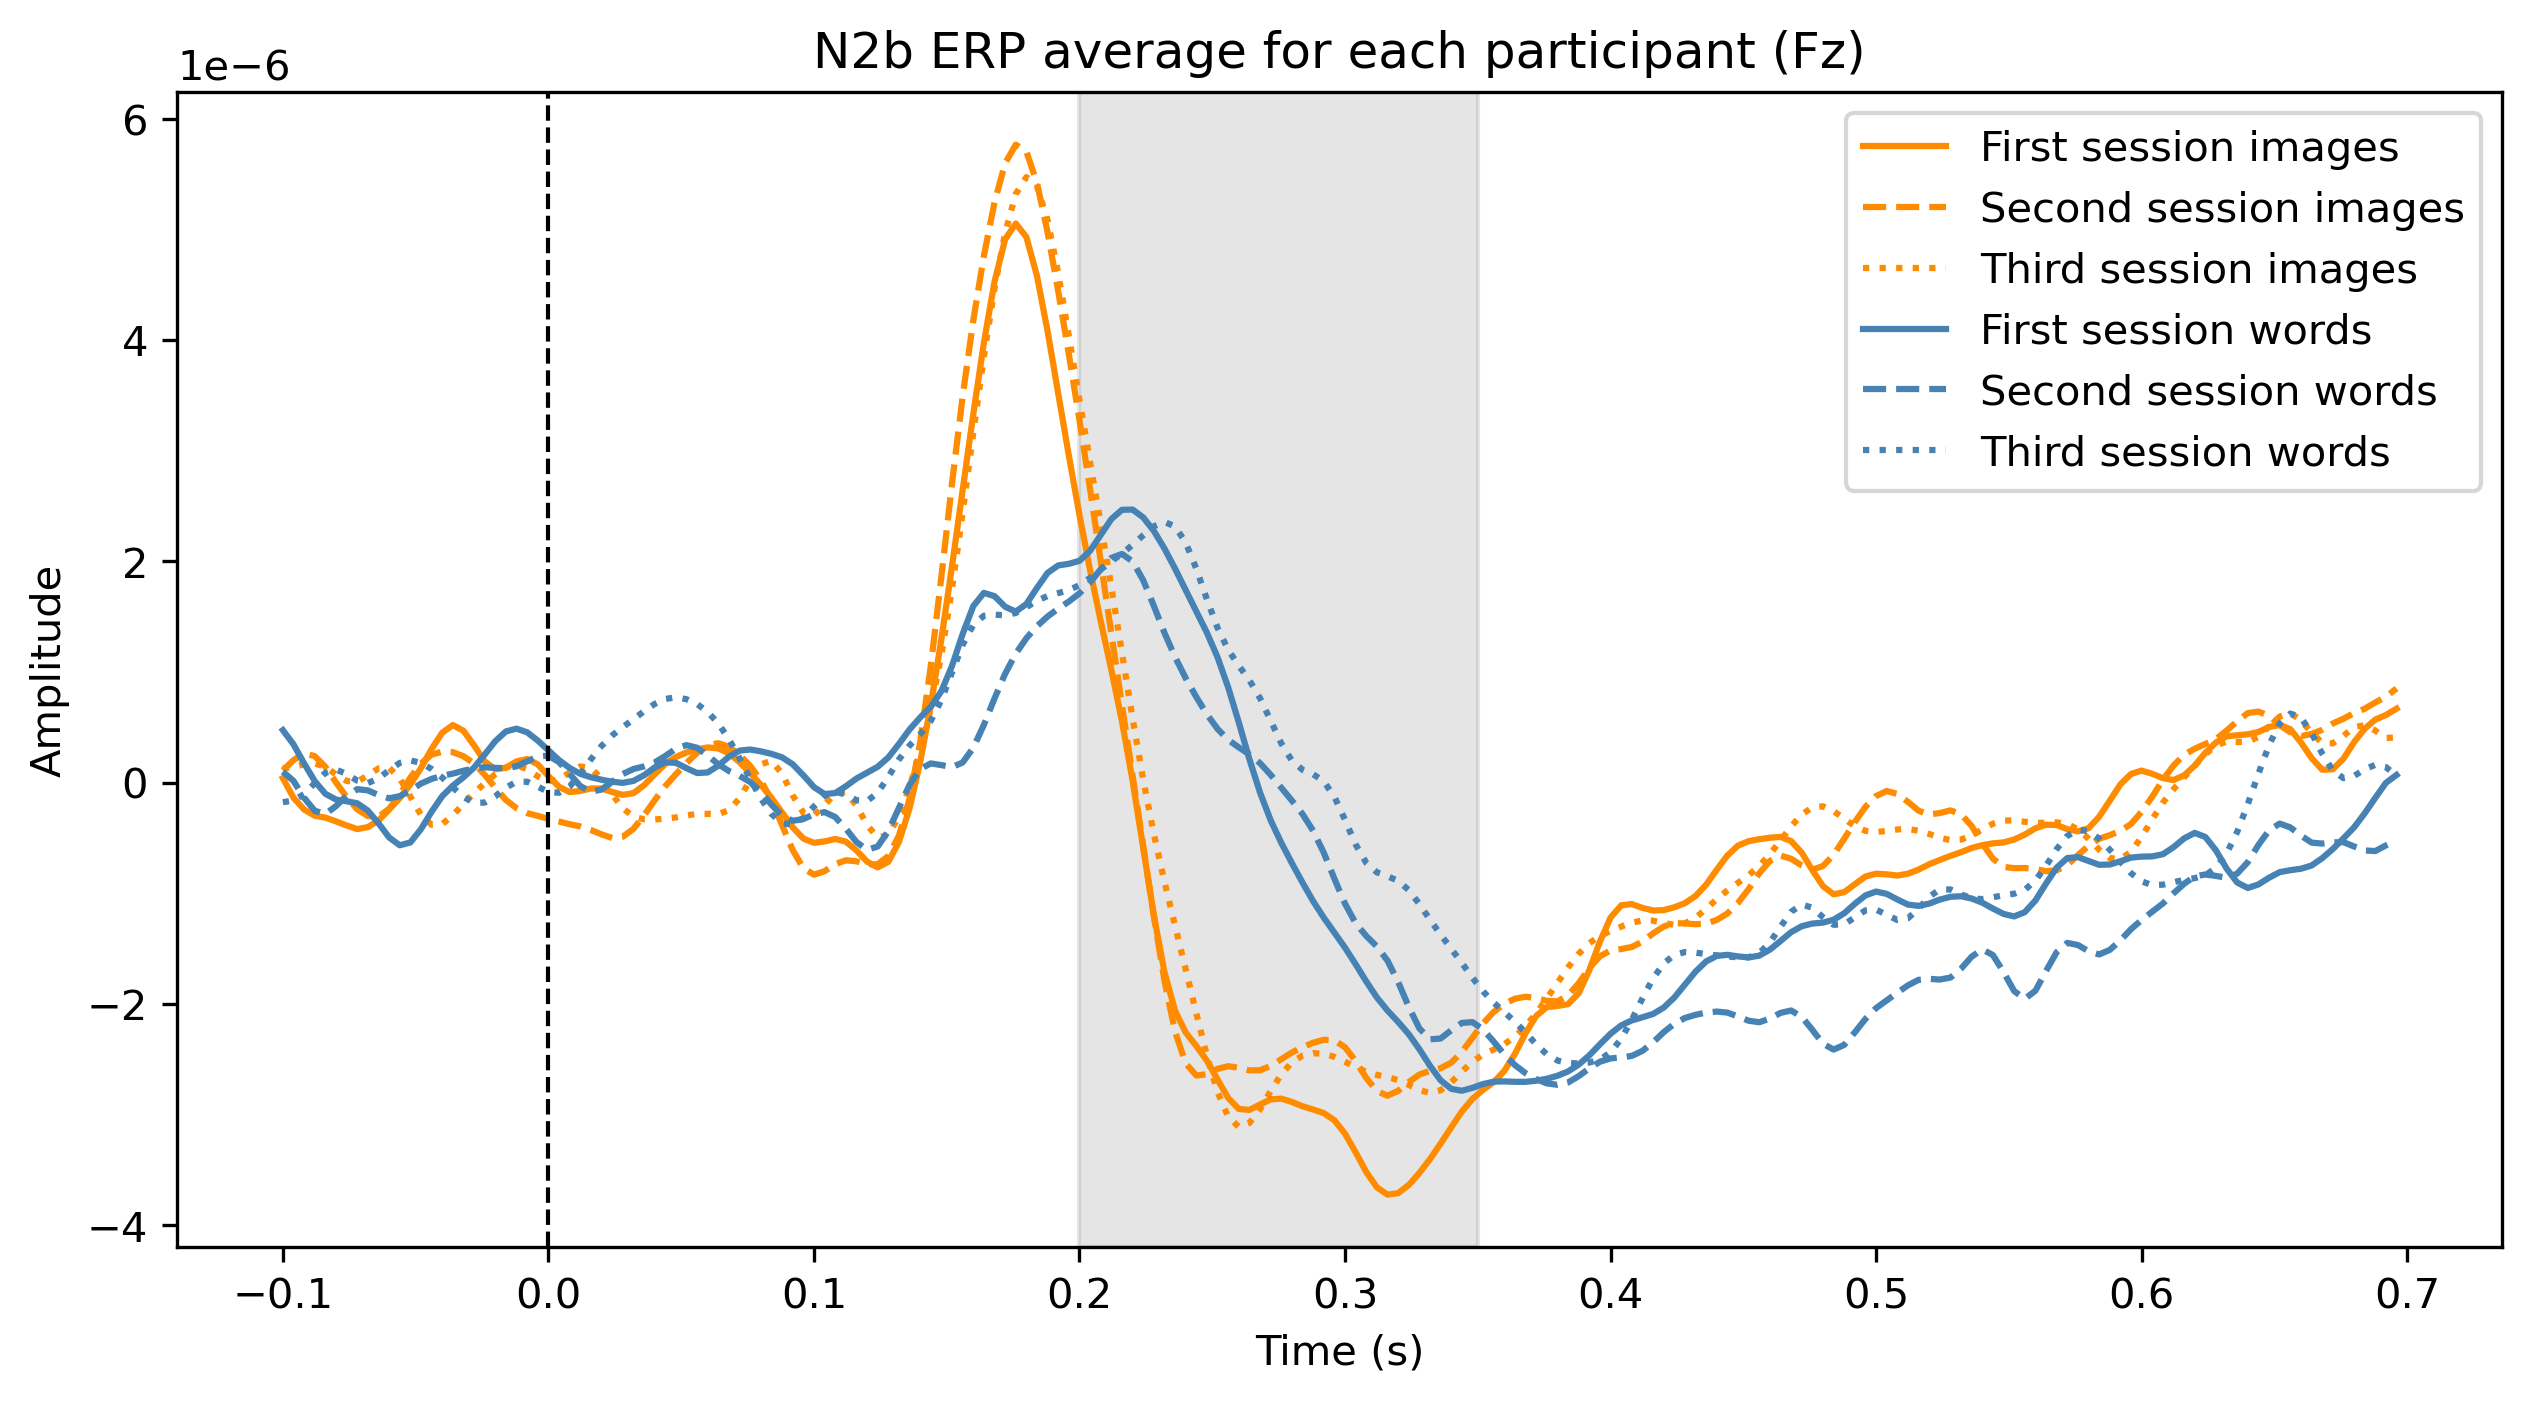

In [ ]:
# averaging over participants for pos and neg separately

fig, ax = plt.subplots(1, figsize=(10, 5), dpi=300)

# plot the time window
ax.axvspan(tmin, tmax, color="grey", alpha=0.2)


ax.plot(times, first_session_pos.mean(axis=0), label="First session images", linestyle="-", color=colours[5])
ax.plot(times, second_session_pos.mean(axis=0), label="Second session images", linestyle="--", color=colours[5])
ax.plot(times, third_session_pos.mean(axis=0), label="Third session images", linestyle=":", color=colours[5])


ax.plot(times, first_session_neg.mean(axis=0), label="First session words", linestyle="-", color=colours[0])
ax.plot(times, second_session_neg.mean(axis=0), label="Second session words", linestyle="--", color=colours[0])
ax.plot(times, third_session_neg.mean(axis=0), label="Third session words", linestyle=":", color=colours[0])

# vertical line at 0
ax.axvline(x=0, color="black", linestyle="--", linewidth=1)

ax.set(xlabel="Time (s)", ylabel="Amplitude", title="N2b ERP average for each participant (Fz)")
ax.legend()

#plt.savefig("erp_avg_LPP_pos and neg.png", format="png", dpi=300, bbox_inches="tight")

plt.show();

In [172]:
# export to CSV


picks = ["Fz"]
#time window
tmin = 0.2
tmax = 0.35

# load in the data session info
data_path = Path("FaceWord_EEG") 

# loading in the file with the bad channels identified by each group
session_info_path = data_path / "session_info.txt"

# load in session information (bad channels, etc.) txt file with dictionary
with open(session_info_path, "r") as f:
    session_info = eval(f.read())

df_list = []
for subj, epochs in zip(session_info.keys(), all_epochs):
    # --- find the time‐sample indices --------------
    times = epochs.times
    win_mask = (times >= tmin) & (times <= tmax)

    # --- get the data & compute LPP ---------------
    # shape = (n_epochs, n_channels, n_times)
    data = epochs.get_data(picks=picks)
    # mean over time, then over channels → (n_epochs,)
    epn_vals = data[:, :, win_mask].mean(axis=2).mean(axis=1) * 1e6  # in µV

    # --- pull out the trial‐by‐trial condition name
    inv_event_id = {v: k for k, v in epochs.event_id.items()}
    conds = [inv_event_id[code] for code in epochs.events[:, 2]]

    # --- build a per‐subject DataFrame --------------
    df_subj = pd.DataFrame({
        'Subject': subj,
        'Condition': conds,
        'N2b_200_350ms': epn_vals
    })

    df_list.append(df_subj)

# --- concatenate all subjects and write CSV -------
df_all = pd.concat(df_list, ignore_index=True)
df_all.to_csv('N2b_200_350ms.csv', index=False)
print("Saved → N2b_200_350ms.csv")


Saved → N2b_200_350ms.csv


# P300 Amplitudes:



[6.05610064e-06 4.50624953e-06 1.08242238e-06 4.60193348e-06
 1.97260436e-06 2.19488271e-06 4.84481980e-06 5.84669745e-06]
[7.20822471e-06 5.11855334e-06 1.90084704e-06 5.47576488e-06
 1.87322595e-06 4.47357587e-06 5.10738942e-06 5.39625605e-06]
[7.89545137e-06 4.26052853e-06 2.26221588e-06 4.13953780e-06
 1.84809500e-06 5.67097227e-06 5.63140032e-06 4.90886881e-06]
1st vs 2nd: TtestResult(statistic=-2.302346847854334, pvalue=0.05480125514262517, df=7)
1st vs 3rd: TtestResult(statistic=-1.337854602811261, pvalue=0.2227713139508276, df=7)
2nd vs 3rd: TtestResult(statistic=-0.026267343449504352, pvalue=0.9797772523721753, df=7)


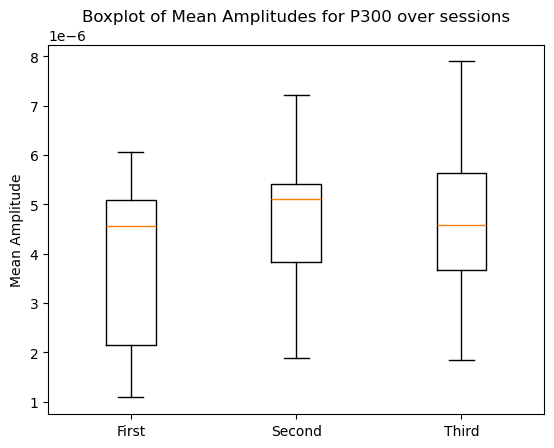

In [173]:
#prep data

picks = ["Pz"]

tmin, tmax = 0.25, 0.500


# create empty arrays to store the data 
first_session = np.array([])
second_session = np.array([])
third_session = np.array([])

for epochs in all_epochs:
    
    epochs_img = epochs["Image"]

    epochs1 = epochs_img[5:60]    
    epochs2 = epochs_img[65:120] 
    epochs3 = epochs_img[125:] 

    # Compute mean amplitude for first block (or NaN if missing)
    data1 = epochs1.get_data(picks=picks, tmin=tmin, tmax=tmax)

    data2 = epochs2.get_data(picks=picks, tmin=tmin, tmax=tmax)
    data3 = epochs3.get_data(picks=picks, tmin=tmin, tmax=tmax)

    data2_mean = np.mean(data2, axis=(0, 1, 2))
    data3_mean = np.mean(data3, axis=(0, 1, 2))
    data1_mean = np.mean(data1, axis=(0, 1, 2))

    first_session = np.append(first_session, data1_mean)
    second_session = np.append(second_session, data2_mean)
    third_session = np.append(third_session, data3_mean)

print(first_session)
print(second_session)
print(third_session)

# stats test for P300

print("1st vs 2nd:", stats.ttest_rel(first_session, second_session))
print("1st vs 3rd:", stats.ttest_rel(first_session, third_session))
print("2nd vs 3rd:", stats.ttest_rel(second_session, third_session))


data = [first_session, second_session, third_session]
# Create a DataFrame


plt.boxplot(data, tick_labels=['First', 'Second', 'Third'])
plt.title('Boxplot of Mean Amplitudes for P300 over sessions')
plt.ylabel('Mean Amplitude')
plt.show();




In [174]:
#prep for plotting
# prep data for plotting

first_session = np.array([])
second_session = np.array ([])
third_session = np.array([])

#slicing based on trials - each showing 60 images

for epochs in all_epochs:

    epochs_img = epochs["Image"]

    epochs1 = epochs_img[5:60]
    epochs2 = epochs_img[65:120]
    epochs3 = epochs_img[125:]

    
    data1 = epochs1.get_data(picks=picks)
    data2 = epochs2.get_data(picks=picks)
    data3 = epochs3.get_data(picks=picks)
    
    data1_mean = np.mean(data1, axis=(0, 1))
    data2_mean = np.mean(data2, axis=(0, 1))
    data3_mean = np.mean(data3, axis=(0, 1))

    # calculate the mean over the channel and trial dimension (axis 1 and 2)
    # we keep the time dimension (axis 0) to plot the time course
    first_session = np.concatenate((first_session, data1_mean), axis=0)
    second_session = np.concatenate((second_session, data2_mean), axis = 0)
    third_session = np.concatenate((third_session, data3_mean), axis = 0)
    

print(first_session.shape)
print(second_session.shape)
print(third_session.shape)

#reshape to participant, time
first_session = first_session.reshape(8, 200)
second_session = second_session.reshape(8, 200)
third_session = third_session.reshape(8, 200)


print(first_session.shape)
print(second_session.shape)
print(third_session.shape)

(1600,)
(1600,)
(1600,)
(8, 200)
(8, 200)
(8, 200)


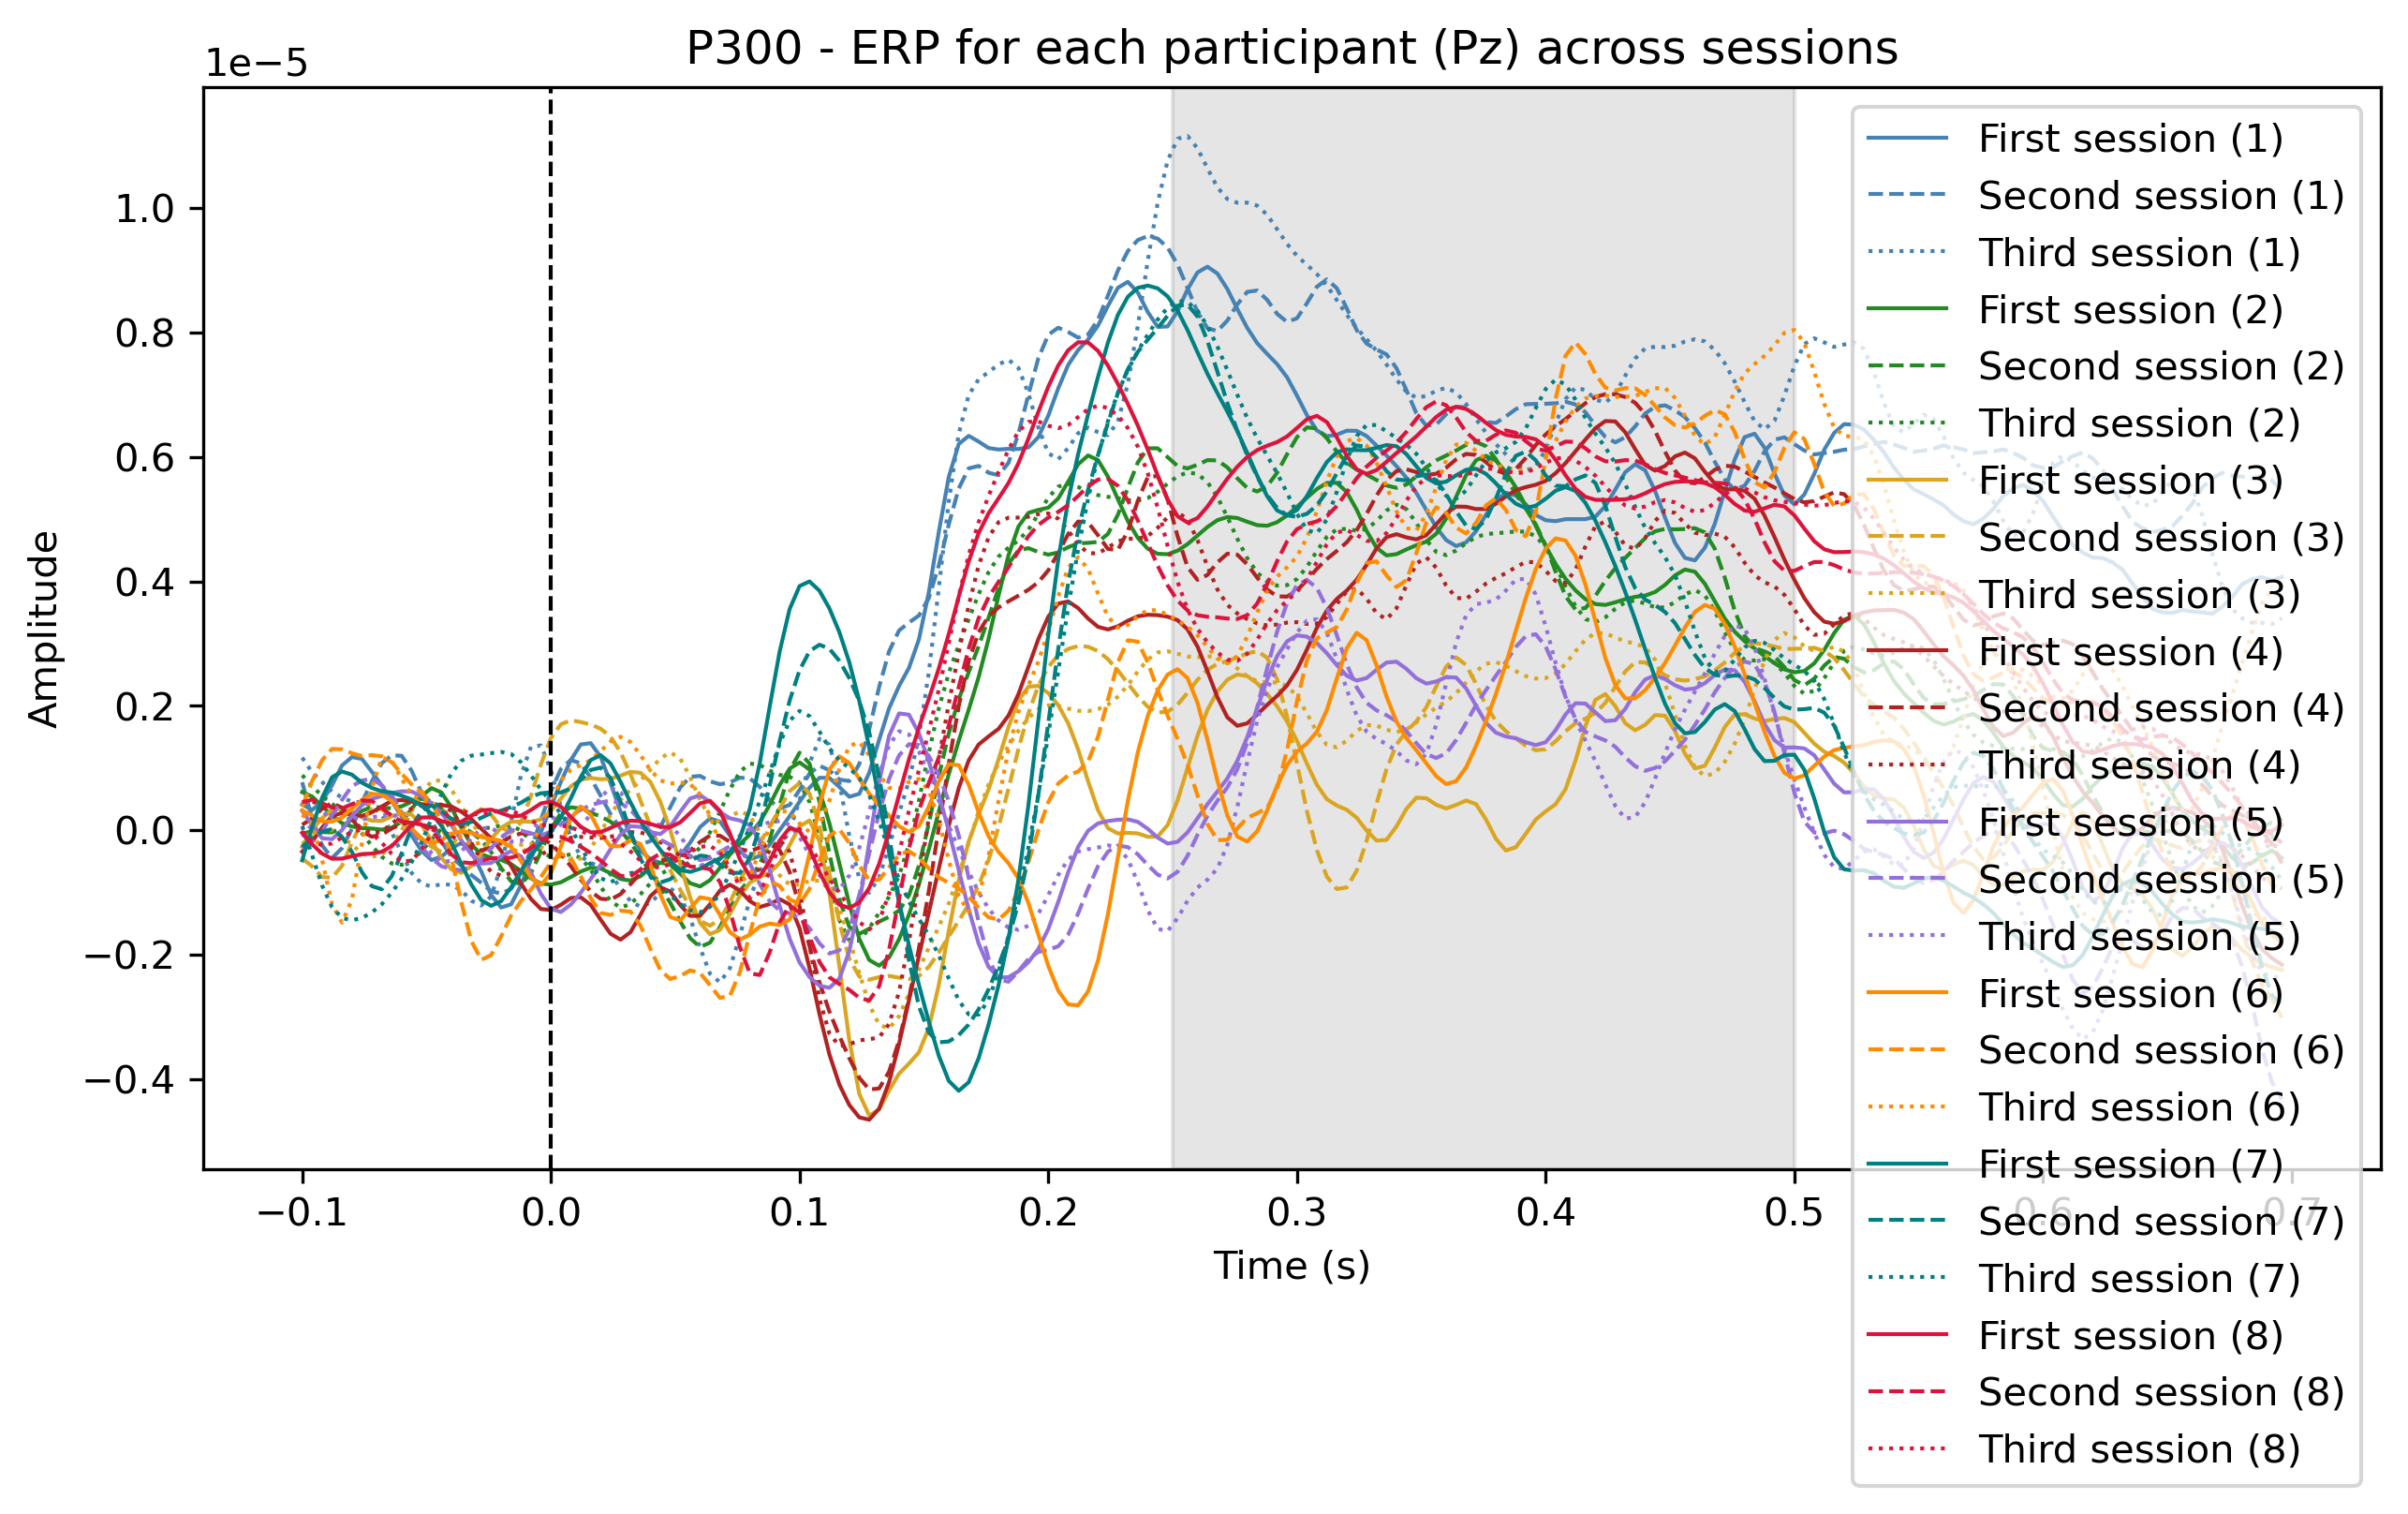

In [ ]:
# plotting averaged timecourses for each participant
colours = [
    "steelblue",
    "forestgreen",
    "goldenrod",
    "firebrick",
    "mediumpurple",
    "darkorange",
    "teal",
    "crimson",
    "darkcyan",
    "slateblue",
    "olivedrab",
    "deeppink",
    "cadetblue",
    "indianred"
]

times = all_epochs[0].times

fig, ax = plt.subplots(1, figsize=(10, 5), dpi=300)

# plot the time window
ax.axvspan(tmin, tmax, color="grey", alpha=0.2)

for participant in range(8):

    ax.plot(times, first_session[participant, :], label=f"First session ({participant+1})", linestyle="-", color=colours[participant], linewidth=1)
    ax.plot(times, second_session[participant, :], label=f"Second session ({participant+1})", linestyle="--", color=colours[participant], linewidth=1)
    ax.plot(times, third_session[participant, :], label=f"Third session ({participant+1})", linestyle=":", color=colours[participant], linewidth=1)


# vertical line at 0
ax.axvline(x=0, color="black", linestyle="--", linewidth=1)

ax.set(xlabel="Time (s)", ylabel="Amplitude", title="P300 - ERP for each participant (Pz) across sessions")

ax.legend()

plt.show();


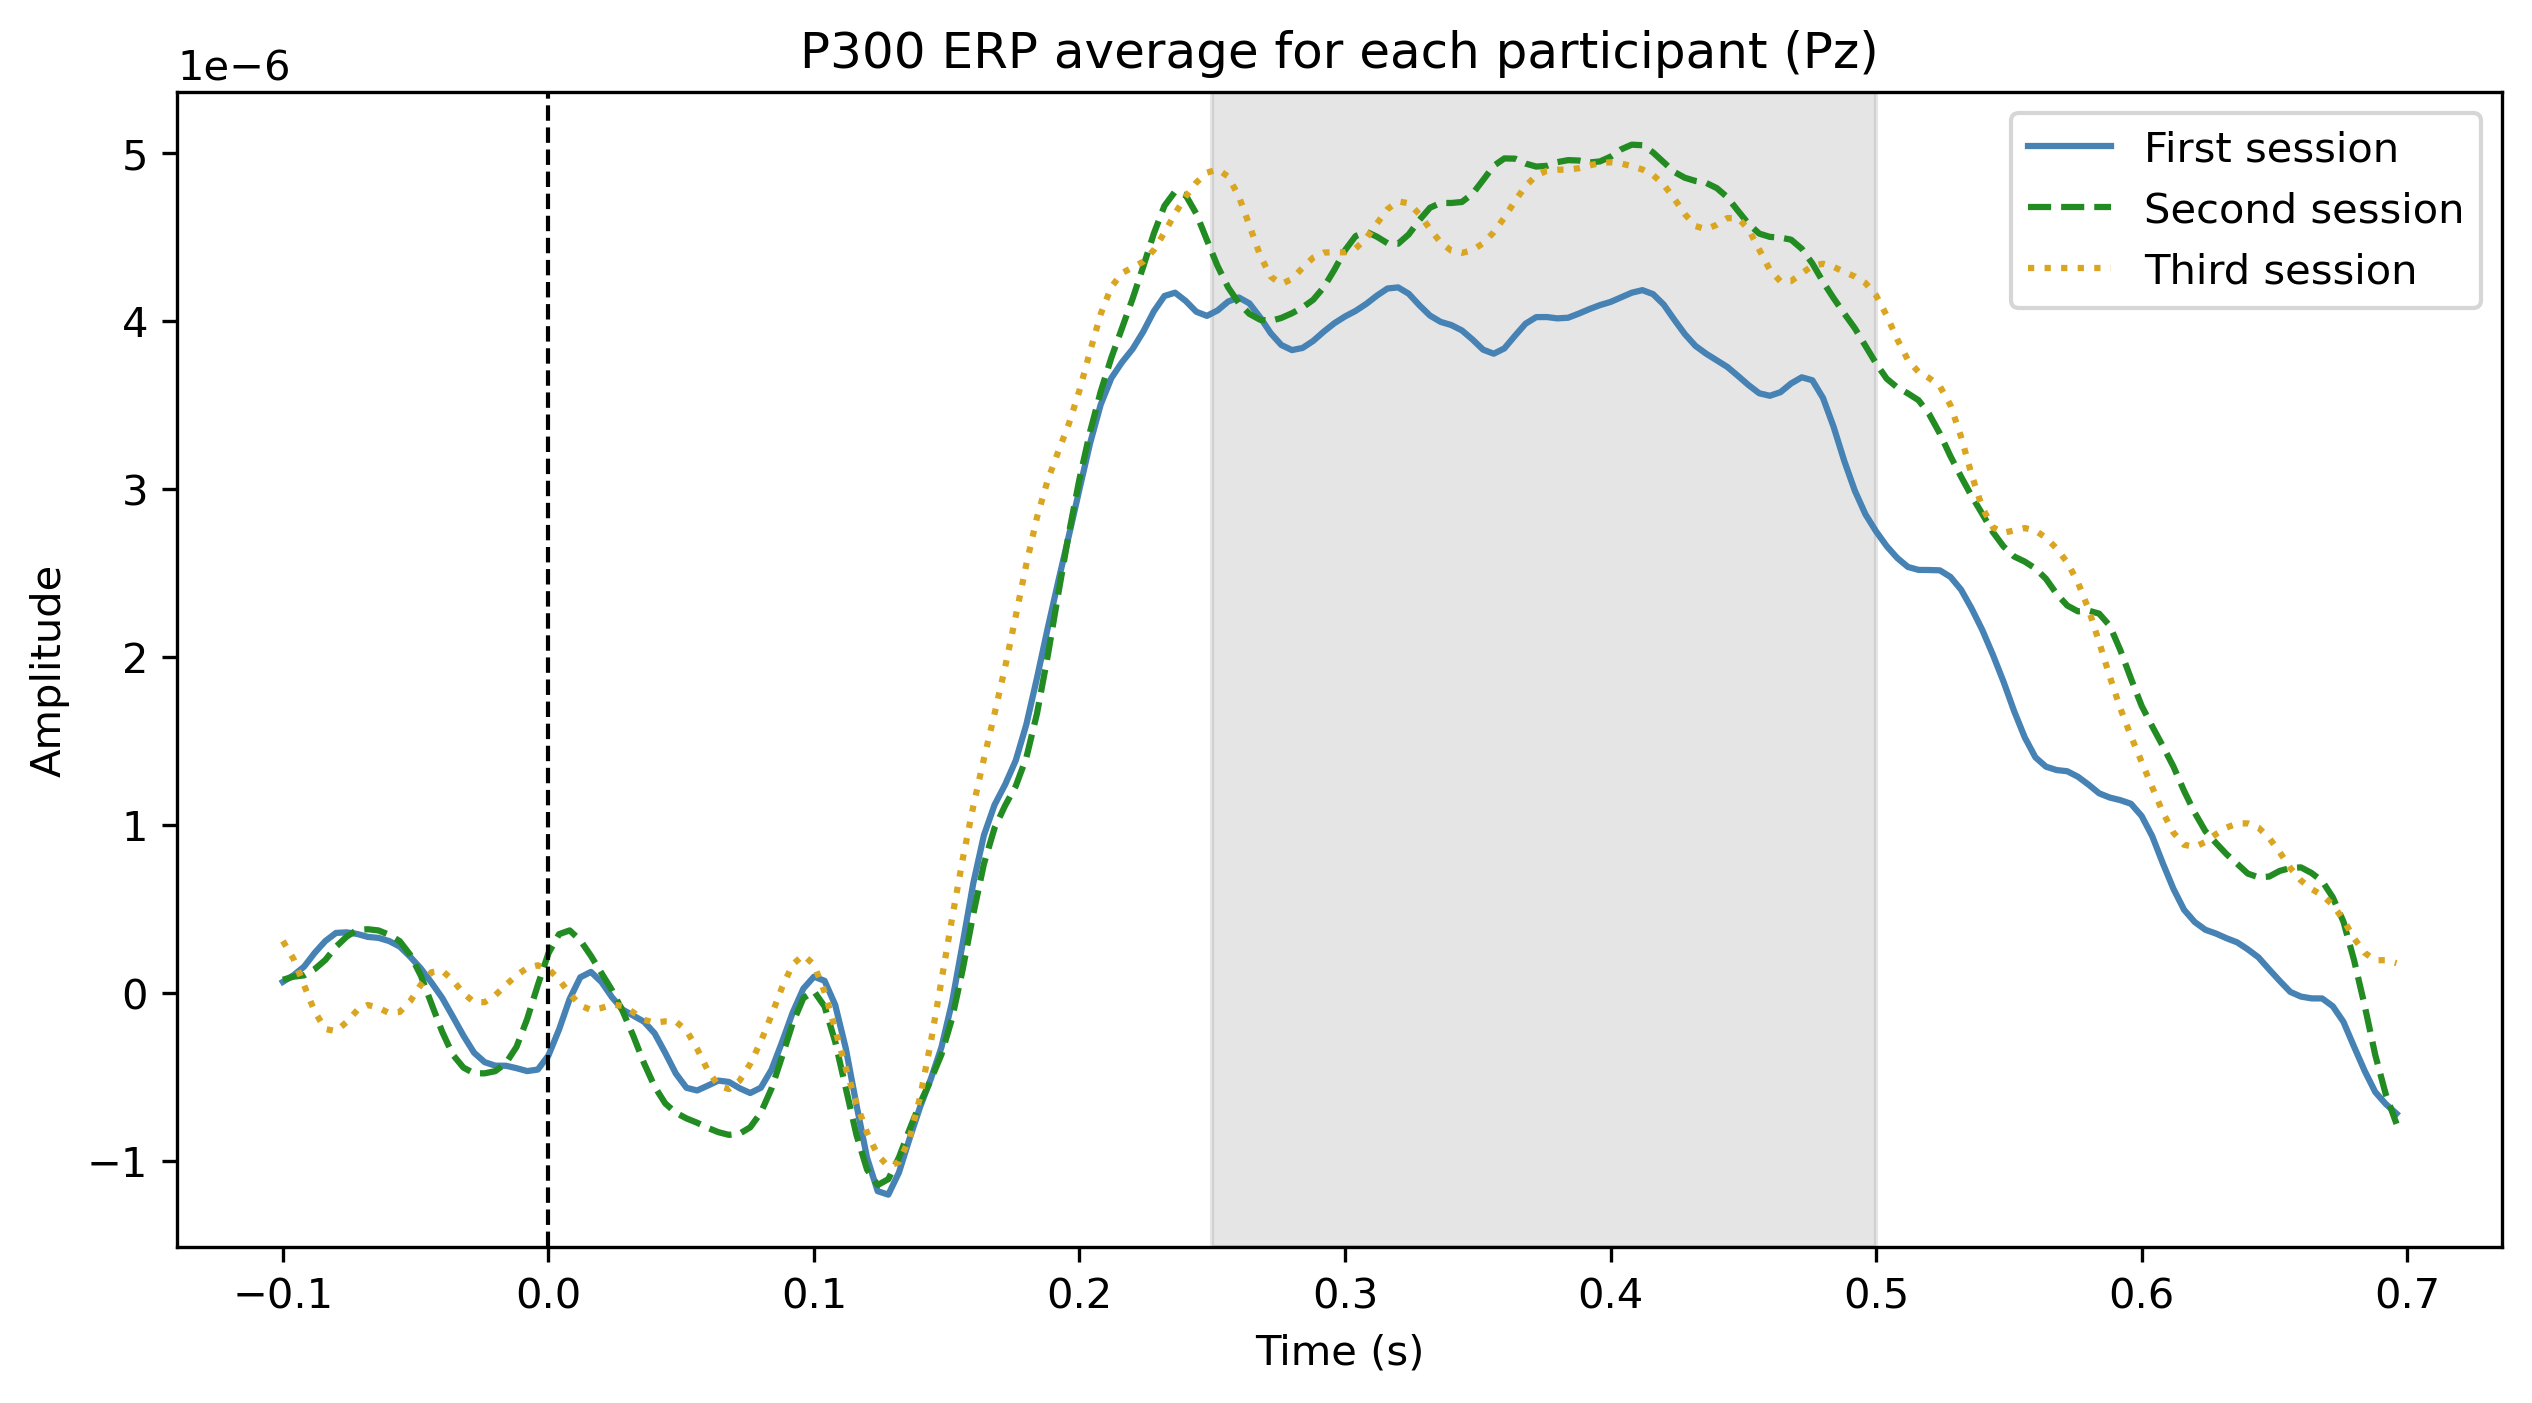

In [176]:
# averaging over participants
fig, ax = plt.subplots(1, figsize=(10, 5), dpi=300)

# plot the time window
ax.axvspan(tmin, tmax, color="grey", alpha=0.2)

ax.plot(times, first_session.mean(axis=0), label="First session", linestyle="-", color=colours[0])
ax.plot(times, second_session.mean(axis=0), label="Second session", linestyle="--", color=colours[1])
ax.plot(times, third_session.mean(axis=0), label="Third session", linestyle=":", color=colours[2])

# vertical line at 0
ax.axvline(x=0, color="black", linestyle="--", linewidth=1)

ax.set(xlabel="Time (s)", ylabel="Amplitude", title="P300 ERP average for each participant (Pz)")
ax.legend()

plt.show();

In [ ]:
#export to csv


picks = ["Pz"]
#time window
tmin = 0.25
tmax = 0.5

# load in the data session info
data_path = Path("FaceWord_EEG") 

# loading in the file with the bad channels identified by each group
session_info_path = data_path / "session_info.txt"

# load in session information (bad channels, etc.) txt file with dictionary
with open(session_info_path, "r") as f:
    session_info = eval(f.read())

df_list = []
for subj, epochs in zip(session_info.keys(), all_epochs):
    # --- find the time‐sample indices --------------
    times = epochs.times
    win_mask = (times >= tmin) & (times <= tmax)

    # --- get the data & compute LPP ---------------
    # shape = (n_epochs, n_channels, n_times)
    data = epochs.get_data(picks=picks)
    # mean over time, then over channels → (n_epochs,)
    epn_vals = data[:, :, win_mask].mean(axis=2).mean(axis=1) * 1e6  # in µV

    # --- pull out the trial‐by‐trial condition name
    inv_event_id = {v: k for k, v in epochs.event_id.items()}
    conds = [inv_event_id[code] for code in epochs.events[:, 2]]

    # --- build a per‐subject DataFrame --------------
    df_subj = pd.DataFrame({
        'Subject': subj,
        'Condition': conds,
        'P300_250_500ms': epn_vals
    })

    df_list.append(df_subj)

# --- concatenate all subjects and write CSV -------
df_all = pd.concat(df_list, ignore_index=True)
df_all.to_csv('P300_250_500ms.csv', index=False)

print("Saved → P300_250_500ms.csv")


Saved → P300_250_500ms.csv
